In [51]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # for plotting facilities

In [52]:
data = 'feature_metric.csv'

df = pd.read_csv(data)
df = df[['region', 'measure', 'epoch_', 'value',
       'Subject', 'Score_median_first20']]

In [53]:
### agg cortex into 14 nodes

In [54]:
r = df.region.drop_duplicates()
r

0       7Networks_LH_Vis_1
1       7Networks_LH_Vis_2
2       7Networks_LH_Vis_3
3       7Networks_LH_Vis_4
4       7Networks_LH_Vis_5
               ...        
1035             Vermis IX
1036              Right IX
1037                Left X
1038              Vermis X
1039               Right X
Name: region, Length: 1040, dtype: object

In [55]:
cortex = r[:998].apply(lambda x: x[10:].split('_'))
cortex = cortex.tolist()
cortex = pd.DataFrame(cortex, columns=['hemisphere', 'network', 'position', 'num'])
cortex['num'] = cortex.apply(lambda r: r['position'] if not r['num'] else r['num'], axis=1)
cortex['position'] = cortex.apply(lambda r: None if not r['num'] != r['position'] else r['position'], axis=1)
cortex

,hemisphere,network,position,num
0,LH,Vis,None,1
1,LH,Vis,None,2
2,LH,Vis,None,3
3,LH,Vis,None,4
4,LH,Vis,None,5
...,...,...,...,...
993,RH,Default,pCunPCC,16
994,RH,Default,pCunPCC,17
995,RH,Default,pCunPCC,18
996,RH,Cont,pCun,2


In [56]:
cortex.describe()

,hemisphere,network,position,num
count,998,998,643,998
unique,2,7,23,103
top,LH,Default,Post,1
freq,500,212,102,49


In [57]:
subc = r[998:].apply(lambda x: x.split(' '))
subc = subc.to_list()
subc = pd.DataFrame(subc, columns=['hemisphere', 'network', 'position'])
subc['num'] = None
subc.describe()

,hemisphere,network,position,num
count,42,42,6,0
unique,3,16,2,0
top,Left,Crus,I,NaN
freq,17,6,3,NaN


In [58]:
cortex['r'] = 'cor_' + cortex['hemisphere'] + '_' + cortex['network']
subc['r'] = 'subc_' + subc['hemisphere']
# 14 regions from cortex, 3 regions from subc

In [59]:
r

0       7Networks_LH_Vis_1
1       7Networks_LH_Vis_2
2       7Networks_LH_Vis_3
3       7Networks_LH_Vis_4
4       7Networks_LH_Vis_5
               ...        
1035             Vermis IX
1036              Right IX
1037                Left X
1038              Vermis X
1039               Right X
Name: region, Length: 1040, dtype: object

In [60]:
regions_agg = pd.concat([cortex.r, subc.r], axis=0).reset_index(drop=True)
regions_agg = pd.concat([regions_agg.rename('region_agg'), r], axis=1)
regions_agg

,region_agg,region
0,cor_LH_Vis,7Networks_LH_Vis_1
1,cor_LH_Vis,7Networks_LH_Vis_2
2,cor_LH_Vis,7Networks_LH_Vis_3
3,cor_LH_Vis,7Networks_LH_Vis_4
4,cor_LH_Vis,7Networks_LH_Vis_5
...,...,...
1035,subc_Vermis,Vermis IX
1036,subc_Right,Right IX
1037,subc_Left,Left X
1038,subc_Vermis,Vermis X


In [61]:
dfecc = df[df['measure'] == 'eccentricity']
dfecc = dfecc.merge(regions_agg, on='region')

In [62]:
# dfecc.groupby(['Subject', 'measure', 'epoch_', 'region_agg'])['value'].mean()
# by default, pivot_table takes mean

In [63]:
dfecc = dfecc.pivot_table(columns=['epoch_', 'region_agg'],
               values=['value'],
               index=['Subject', 'Score_median_first20'])

dfecc

value                                 \
epoch_                               b2e                                  
region_agg                   cor_LH_Cont cor_LH_Default cor_LH_DorsAttn   
Subject Score_median_first20                                              
AB1     14.0                    0.096832       0.285795        0.336393   
AG1     47.0                    0.023247       0.134270        0.016678   
AH1     41.5                   -0.323308      -0.037860       -0.711544   
AM1     27.0                    0.175577       0.412751        0.288554   
AP1     17.0                    0.467508       0.169592       -0.193752   
AV1     48.5                   -0.038907      -0.278500        0.676340   
BN1     75.0                    0.056349      -0.016979       -0.353304   
CD1     15.0                    0.051840      -0.055279       -0.196941   
CG1     32.0                    0.108409       0.024720        0.175183   
CH1     39.0                    0.177342      -0.087421       -0.016997   
CK1     34.0                    0.086924       0.137110        0.299040   
CM1     29.5                    0.210084      -0.287603        0.282841   
CM2     73.0                    0.268694       0.294601       -0.253968   
EH1     21.0                    0.387339       0.257275        0.291328   
EK1     12.0                    0.013718      -0.145739        0.582988   
HK1     17.0                    0.321216       0.582425        0.415549   
HS1     67.0                    0.170226      -0.168491        0.353160   
JC1     12.5                    0.441986       0.234091        0.437221   
JH1     8.5                    -0.026666       0.106128        0.104092   
JM1     34.0                   -0.281974      -0.076701        0.006779   
JR1     34.0                   -0.072512       0.251876       -0.125334   
JS1     57.0                    0.057821       0.119935        0.076817   
KK1     11.5                   -0.025902       0.484708        0.069643   
KP1     38.0                    0.131821       0.172627        0.242722   
KR1     25.0                    0.492554       0.689035        0.391546   
LB1     12.0                   -0.088604       0.422639        0.162973   
MB1     39.0                   -0.056847       0.236683       -0.310333   
MG1     57.0                   -0.252071      -0.571489       -0.340796   
MP1     45.0                    0.038101      -0.436873       -0.311200   
NW1     26.0                   -0.284932      -0.155696        0.231738   
SK1     39.0                    0.353440       0.344001       -0.212267   
SM2     44.0                    0.156058       0.257919        0.384763   
SR1     21.5                   -0.047300      -0.070251       -0.042661   
UP1     46.0                    0.141589       0.151221        0.142272   
WK1     62.0                    0.068048       0.233606        0.053965   
ZN1     55.0                    0.146824      -0.541973       -0.176711   

                                                                             \
epoch_                                                                        
region_agg                   cor_LH_Limbic cor_LH_SalVentAttn cor_LH_SomMot   
Subject Score_median_first20                                                  
AB1     14.0                      0.191118           0.141011      0.004024   
AG1     47.0                     -0.172098           0.584519      0.466026   
AH1     41.5                     -0.305593          -0.227577      0.013477   
AM1     27.0                      0.048740           0.684970      0.351564   
AP1     17.0                     -0.240978           0.309113     -0.226975   
AV1     48.5                     -0.182464           0.137662      0.267408   
BN1     75.0                     -0.461987          -0.095968     -0.302246   
CD1     15.0                     -0.095444          -0.239501     -0.159295   
CG1     32.0                     -0.050737          -0.377077     -0.248930   
CH1    

In [64]:
dfecc[('value',  'b2e', 'cor_LH_Cont')]

Subject  Score_median_first20
AB1      14.0                    0.096832
AG1      47.0                    0.023247
AH1      41.5                   -0.323308
AM1      27.0                    0.175577
AP1      17.0                    0.467508
AV1      48.5                   -0.038907
BN1      75.0                    0.056349
CD1      15.0                    0.051840
CG1      32.0                    0.108409
CH1      39.0                    0.177342
CK1      34.0                    0.086924
CM1      29.5                    0.210084
CM2      73.0                    0.268694
EH1      21.0                    0.387339
EK1      12.0                    0.013718
HK1      17.0                    0.321216
HS1      67.0                    0.170226
JC1      12.5                    0.441986
JH1      8.5                    -0.026666
JM1      34.0                   -0.281974
JR1      34.0                   -0.072512
JS1      57.0                    0.057821
KK1      11.5                   -0.025902
KP1 

In [65]:
X = dfecc.reset_index().drop(['Subject', 'Score_median_first20'], axis=1)

y = dfecc.reset_index()['Score_median_first20']

/var/folders/2q/y6tqndfj1yqfc7hcdp99tz_00000gn/T/ipykernel_18449/1566465353.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = dfecc.reset_index().drop(['Subject', 'Score_median_first20'], axis=1)


In [67]:
# from sklearn import preprocessing
# lbl = preprocessing.LabelEncoder()

# for f in X.columns:
    # X[f] = lbl.fit_transform(X[f].astype(str))

# y = lbl.fit_transform(y.astype(str))

In [68]:
import xgboost as xgb


# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y,
                           # enable_categorical=True
                           )

## **4.5 Split data into separate training and test set** <a class="anchor" id="4.5"></a>

[Table of Contents](#0.1)

In [69]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [70]:
y_test

31    44.0
20    34.0
16    67.0
30    39.0
22    11.5
15    17.0
10    34.0
2     41.5
11    29.5
29    26.0
27    57.0
Name: Score_median_first20, dtype: float64

In [86]:
X_test

value                                               \
epoch_             b2e                                                
region_agg cor_LH_Cont cor_LH_Default cor_LH_DorsAttn cor_LH_Limbic   
31            0.156058       0.257919        0.384763      0.080896   
20           -0.072512       0.251876       -0.125334      0.136915   
16            0.170226      -0.168491        0.353160     -0.060915   
30            0.353440       0.344001       -0.212267      0.011286   
22           -0.025902       0.484708        0.069643     -0.103952   
15            0.321216       0.582425        0.415549      0.005094   
10            0.086924       0.137110        0.299040     -0.123841   
2            -0.323308      -0.037860       -0.711544     -0.305593   
11            0.210084      -0.287603        0.282841      0.191320   
29           -0.284932      -0.155696        0.231738     -0.321735   
27           -0.252071      -0.571489       -0.340796     -0.205559   

                                                                    \
epoch_                                                               
region_agg cor_LH_SalVentAttn cor_LH_SomMot cor_LH_Vis cor_RH_Cont   
31                   0.152030      0.202089   0.151459   -0.094142   
20                  -0.049604     -0.354429  -0.095955    0.192945   
16                   0.104842      0.046738   0.540557    0.363904   
30                  -0.277125     -0.489517  -0.061978    0.330996   
22                   0.453943      0.125557   0.744675    0.217756   
15                   0.273420      0.180396   0.045845    0.132566   
10                   0.162907      0.514591   0.492125    0.150974   
2                   -0.227577      0.013477  -0.423758   -0.185166   
11                  -0.181049      0.408398  -0.415814    0.109322   
29                   0.158029      0.738793  -0.509783   -0.087884   
27                  -0.285394     -0.190710  -0.268854   -0.198966   

                                           ...                             \
epoch_                                     ...        late                  
region_agg cor_RH_Default cor_RH_DorsAttn  ... cor_RH_Cont cor_RH_Default   
31              -0.164098        0.193566  ...    2.368565       2.319486   
20              -0.159106       -0.083395  ...    1.767363       1.844408   
16              -0.218475        0.434677  ...    1.749179       1.640362   
30               0.195117       -0.078838  ...    2.246061       2.085018   
22               0.099546        0.239251  ...    1.844331       1.939742   
15               0.025067        0.036989  ...    2.017204       1.528434   
10               0.323942        0.202864  ...    1.802336       1.631477   
2               -0.366852       -0.494792  ...    1.469235       1.521187   
11              -0.269060       -0.058011  ...    1.714557       1.964727   
29              -0.138356        0.496930  ...    3.079307       2.663945   
27              -0.395889       -0.384115  ...    1.588440       1.480362   

                                                                           \
epoch_                                                                      
region_agg cor_RH_DorsAttn cor_RH_Limbic cor_RH_SalVentAttn cor_RH_SomMot   
31                3.058632      1.231436           2.313356      2.359852   
20                2.340844      1.113321           1.676130      1.741595   
16                1.796140      0.959187           1.704678      2.418599   
30                2.281964      1.093341           1.855895      2.148046   
22                2.342958      1.196451           1.699696      2.183249   
15                2.036788      0.782307           1.652856      1.783014   
10                2.053382      0.788506           1.592865      1.981506   
2                 1.966960      0.732602           1.522058      1.714008   
11                1.917768      1.043854           1.779677      1.965310   
29                2.993097      1.7666

In [163]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

params = {'n_estimators': 50,
          'max_depth': 5,
          'eta': 0.1,
          'subsample': .7,
          'colsample_bytree': 0.05}

xgb_clf = XGBRegressor(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

mean_squared_error(y_train, xgb_clf.predict(X_train))

7.409615355342903

In [151]:
# make predictions on test data

y_pred = xgb_clf.predict(X_test)

In [174]:
y_test

31    44.0
20    34.0
16    67.0
30    39.0
22    11.5
15    17.0
10    34.0
2     41.5
11    29.5
29    26.0
27    57.0
Name: Score_median_first20, dtype: float64

In [175]:
y_pred

array([41.837845, 37.90187 , 30.228247, 37.3446  , 28.83172 , 20.715261,
       26.554504, 36.245537, 41.573368, 29.746798, 34.527725],
      dtype=float32)

In [164]:
# compute and print accuracy score


print('XGBoost model mean sq error: {0:0.4f}'. format(mean_squared_error(y_test, y_pred)))

XGBoost model mean sq error: 221.5315


We can see that XGBoost obtain very high accuracy score of 91.67%.

# **6. Feature importance with XGBoost** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)


- XGBoost provides a way to examine the importance of each feature in the original dataset within the model. 

- It involves counting the number of times each feature is split on across all boosting trees in the model. 

- Then we visualize the result as a bar graph, with the features ordered according to how many times they appear.

- XGBoost has a **plot_importance()** function that helps us to achieve this task. 

- Then we can visualize the features that has been given the highest important score among all the features. 

- Thus XGBoost provides us a way to do feature selection.

- We will proceed as follows:-

In [194]:
scores = xgb_clf.get_booster().get_score()
len(scores)

71

In [195]:
scores

{'value b2e cor_LH_Cont': 2.0,
 'value b2e cor_LH_Default': 2.0,
 'value b2e cor_LH_DorsAttn': 13.0,
 'value b2e cor_LH_Limbic': 8.0,
 'value b2e cor_LH_SalVentAttn': 17.0,
 'value b2e cor_LH_SomMot': 4.0,
 'value b2e cor_RH_Default': 8.0,
 'value b2e cor_RH_DorsAttn': 6.0,
 'value b2e cor_RH_Limbic': 6.0,
 'value b2e cor_RH_SalVentAttn': 8.0,
 'value b2e cor_RH_SomMot': 3.0,
 'value b2e cor_RH_Vis': 12.0,
 'value b2e subc_Left': 10.0,
 'value b2e subc_Right': 6.0,
 'value b2e subc_Vermis': 4.0,
 'value baseline cor_LH_Cont': 7.0,
 'value baseline cor_LH_Default': 7.0,
 'value baseline cor_LH_DorsAttn': 2.0,
 'value baseline cor_LH_Limbic': 1.0,
 'value baseline cor_LH_SalVentAttn': 15.0,
 'value baseline cor_LH_SomMot': 5.0,
 'value baseline cor_LH_Vis': 3.0,
 'value baseline cor_RH_Cont': 6.0,
 'value baseline cor_RH_Default': 7.0,
 'value baseline cor_RH_DorsAttn': 14.0,
 'value baseline cor_RH_Limbic': 3.0,
 'value baseline cor_RH_SalVentAttn': 3.0,
 'value baseline cor_RH_SomMot':

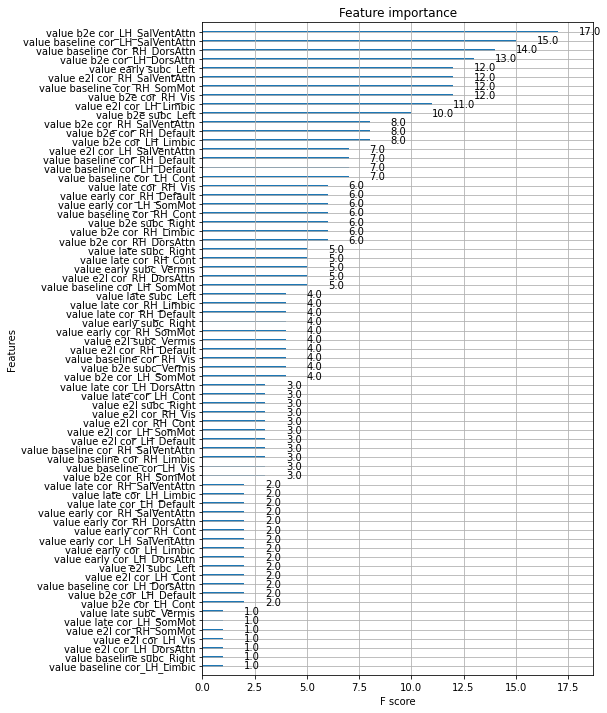

In [184]:
plt.rcParams["figure.figsize"] = (7, 12)

xgb.plot_importance(xgb_clf)

plt.show()

- We can see that the feature `Delicassesn` has been given the highest importance score among all the features. 

- Based upon this importance score, we can select the features with highest importance score and discard the redundant ones.

- Thus XGBoost also gives us a way to do feature selection.

# **8. References** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)


The ideas and concepts in this kernel are taken from the following websites -

-	https://www.datacamp.com/community/tutorials/xgboost-in-python

-	https://blog.cambridgespark.com/getting-started-with-xgboost-3ba1488bb7d4

-	https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7

-	https://heartbeat.fritz.ai/boosting-your-machine-learning-models-using-xgboost-d2cabb3e948f

-	https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d

-   https://medium.com/@gabrieltseng/gradient-boosting-and-xgboost-c306c1bcfaf5

-   https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d